# L15-Clustering

# 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering</a></span></li></ul></div>

# 

The Data Set: The data set used in this example is based on a famous Scotish Whiskies data set. This website contains the original data set, but you need to be careful with using this data set as the LAT and LONG coordinates are not in the normal international format. The following data set contains two additional variables that contain the internationally recognized coordinates and these are recognized by Google Maps and all other mapping tools.

## Data Loading

Let’s get started and read in the data set

In [1]:
import pandas as pd

In [2]:
whisky_file = "whiskies_b.txt"
whisky = pd.read_csv(whisky_file, header=0)

In [3]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,lat,long
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH152EB,286580,749680,56.625191,-3.850199
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB389PJ,326340,842570,57.467395,-3.229644
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB55LI,352960,839320,57.441751,-2.785295
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA427EB,141560,646220,55.640607,-6.108503
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB544NH,355350,829140,57.350557,-2.743628


In [4]:
whisky.shape

(86, 19)

In [5]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude', 'lat', 'long'],
      dtype='object')

In [6]:
# calculates measures of central tendency
whisky.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude,lat,long
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01,86.000000,86.000000
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05,57.091985,-3.842120
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04,0.796334,1.077935
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05,54.858193,-6.359365
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05,56.643409,-4.241500
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05,57.443751,-3.344320
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05,57.535823,-3.192340
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06,58.966865,-2.316943


List subsets of records and variables
Here we only display the first 10 records and variables 1-14. (numbering starts at Zero)
ROWID variable is exclude and some of the location variables

In [7]:
whisky.iloc[0:10, 1:14]

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1
5,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2
6,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3
7,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1
8,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2
9,Balblair,2,3,2,1,0,0,2,0,2,1,2,1


## Data Preparation

Let us define the subset of variable to use for clustering

In [8]:
X = whisky.iloc[0:whisky.shape[0], 2:14]

In [9]:
X

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [10]:
X.head(17)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


## Clustering

Do the clustering – But how many Clusters – Use the elbow method to determine the optional number of clusters to use

In [11]:
# Using the elbow method to find the optimal number of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

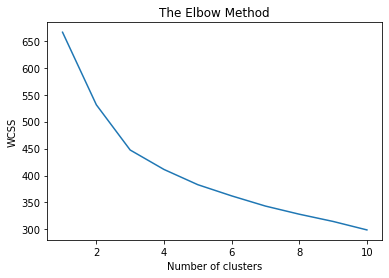

None


In [13]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()
print(plt.show())

Let’s use 4 for the number of cluster build the cluster model based on having 4 clusters. Then fit the model using the data set defined above.

In [14]:
# Applying k-means to the whisky dataset
kmeans_model = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 

Now get predicted clusters for each redords and attach it to the dataframe

In [15]:
y_kmeans = kmeans_model.fit_predict(X)

In [16]:
y_kmeans

array([0, 0, 3, 1, 2, 2, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 2, 2, 3, 1,
       3, 1, 0, 3, 0, 0, 3, 2, 3, 0, 2, 3, 2, 3, 3, 3, 0, 2, 2, 3, 0, 0,
       0, 3, 3, 3, 0, 3, 3, 2, 0, 2, 2, 1, 0, 1, 1, 3, 3, 0, 0, 3, 3, 0,
       1, 2, 1, 3, 0, 0, 2, 3, 2, 0, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3])

What are the centre and mid-points of the clusters?

In [17]:
kmeans_model.cluster_centers_

array([[2.73076923, 2.38461538, 1.46153846, 0.07692308, 0.03846154,
        1.92307692, 1.69230769, 1.84615385, 1.96153846, 2.03846154,
        2.11538462, 1.88461538],
       [3.11111111, 1.44444444, 3.11111111, 2.88888889, 0.55555556,
        0.22222222, 1.55555556, 0.44444444, 1.44444444, 1.44444444,
        1.33333333, 0.44444444],
       [1.66666667, 2.38888889, 1.66666667, 0.61111111, 0.11111111,
        1.44444444, 1.38888889, 1.        , 1.11111111, 1.94444444,
        0.94444444, 1.33333333],
       [1.48484848, 2.39393939, 1.09090909, 0.24242424, 0.06060606,
        0.87878788, 1.09090909, 0.42424242, 1.27272727, 1.63636364,
        2.15151515, 2.09090909]])

Now get the predicted clusters for eacg record and attach it to the dataframe

In [18]:
X.columns

Index(['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy',
       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral'],
      dtype='object')

In [19]:
y = kmeans_model.predict(X)

Now get predicted clusters for each redords and attach it to the dataframe

In [20]:
y_df = pd.DataFrame(y)
cluster_results = whisky
cluster_results["CLUSTER_NUM"] = y_df
cluster_results.head(20)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,lat,long,CLUSTER_NUM
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH152EB,286580,749680,56.625191,-3.850199,0
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB389PJ,326340,842570,57.467395,-3.229644,0
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB55LI,352960,839320,57.441751,-2.785295,3
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA427EB,141560,646220,55.640607,-6.108503,1
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB544NH,355350,829140,57.350557,-2.743628,2
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA278HJ,194050,649950,55.699145,-5.278895,2
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G814SJ,247670,672610,55.922373,-4.439339,3
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,AB553XS,340754,848623,57.523872,-2.990865,0
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,AB553QY,340754,848623,57.523872,-2.990865,3
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,IV191LB,270820,885770,57.842735,-4.177749,3


How many records are in each cluster?

In [21]:
cluster_results.groupby(['CLUSTER_NUM']).size()

CLUSTER_NUM
0    26
1     9
2    18
3    33
dtype: int64